In [10]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

from data.toy_regression import create_split_periodic_data_heteroscedastic, ground_truth_periodic_function
from core import MapDensityEnsemble

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# we are not using gpu, so we might as well use float64 by default as does numpy
tf.keras.backend.set_floatx('float64')
assert tf.executing_eagerly()

figure_dir = './figures'

In [12]:
np.random.seed(0)
n_networks = 5
n_train = 20
batchsize_train = 20

_x_train, y_train = create_split_periodic_data_heteroscedastic(n_train=n_train, seed=42)
x_min, x_max = np.min(_x_train), np.max(_x_train)
d = x_max - x_min
lower_bound = x_min - d / 2
upper_bound = x_max + d / 2

scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(_x_train)
# we can use _x_train for plotting and x_train for training
x_train = scaler.transform(_x_train)

_x_test = np.linspace(lower_bound, upper_bound, 500).reshape(-1, 1)
y_test = ground_truth_periodic_function(_x_test)
x_test = scaler.transform(_x_test)

layer_units = [500] * 4 + [2]
layer_activations = ["relu"] * 4 + ["linear"]

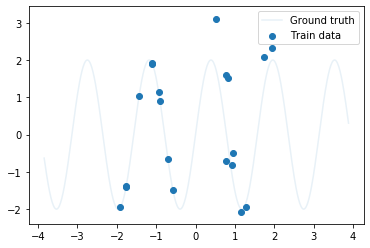

In [13]:
fig, ax = plt.subplots()
ax.plot(_x_test, y_test, label="Ground truth", alpha=0.1)
ax.scatter(_x_train, y_train, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.legend();

In [14]:
ensemble = MapDensityEnsemble(n_networks=n_networks,
                       input_shape=[1],
                       layer_units=layer_units,
                       layer_activations=layer_activations)

In [15]:
ensemble.train(x_train=x_train, y_train=y_train, batchsize_train=batchsize_train, epochs=120)

Train on 20 samples
Epoch 1/120
20/20 [==============================] - 0s 22ms/sample - loss: 3.3772
Epoch 2/120
20/20 [==============================] - 0s 485us/sample - loss: 7.4854
Epoch 3/120
20/20 [==============================] - 0s 587us/sample - loss: 5.6599
Epoch 4/120
20/20 [==============================] - 0s 478us/sample - loss: 5.6564
Epoch 5/120
20/20 [==============================] - 0s 487us/sample - loss: 3.2134
Epoch 6/120
20/20 [==============================] - 0s 520us/sample - loss: 3.1567
Epoch 7/120
20/20 [==============================] - 0s 553us/sample - loss: 2.8494
Epoch 8/120
20/20 [==============================] - 0s 611us/sample - loss: 2.7941
Epoch 9/120
20/20 [==============================] - 0s 540us/sample - loss: 2.6896
Epoch 10/120
20/20 [==============================] - 0s 431us/sample - loss: 2.5165
Epoch 11/120
20/20 [==============================] - 0s 607us/sample - loss: 2.3209
Epoch 12/120
20/20 [==============================] - 0

Epoch 98/120
20/20 [==============================] - 0s 468us/sample - loss: 0.5900
Epoch 99/120
20/20 [==============================] - 0s 420us/sample - loss: 0.5860
Epoch 100/120
20/20 [==============================] - 0s 412us/sample - loss: 0.5755
Epoch 101/120
20/20 [==============================] - 0s 515us/sample - loss: 0.5587
Epoch 102/120
20/20 [==============================] - 0s 413us/sample - loss: 0.5457
Epoch 103/120
20/20 [==============================] - 0s 436us/sample - loss: 0.5314
Epoch 104/120
20/20 [==============================] - 0s 638us/sample - loss: 0.5159
Epoch 105/120
20/20 [==============================] - 0s 589us/sample - loss: 0.5017
Epoch 106/120
20/20 [==============================] - 0s 560us/sample - loss: 0.4820
Epoch 107/120
20/20 [==============================] - 0s 518us/sample - loss: 0.4487
Epoch 108/120
20/20 [==============================] - 0s 636us/sample - loss: 0.4216
Epoch 109/120
20/20 [==============================] - 0

20/20 [==============================] - 0s 424us/sample - loss: 1.1064
Epoch 75/120
20/20 [==============================] - 0s 454us/sample - loss: 1.4011
Epoch 76/120
20/20 [==============================] - 0s 447us/sample - loss: 3.6031
Epoch 77/120
20/20 [==============================] - 0s 401us/sample - loss: 1.5992
Epoch 78/120
20/20 [==============================] - 0s 371us/sample - loss: 2.7204
Epoch 79/120
20/20 [==============================] - 0s 459us/sample - loss: 1.9861
Epoch 80/120
20/20 [==============================] - 0s 390us/sample - loss: 1.7165
Epoch 81/120
20/20 [==============================] - 0s 485us/sample - loss: 1.6471
Epoch 82/120
20/20 [==============================] - 0s 434us/sample - loss: 1.6236
Epoch 83/120
20/20 [==============================] - 0s 466us/sample - loss: 1.6870
Epoch 84/120
20/20 [==============================] - 0s 506us/sample - loss: 1.7380
Epoch 85/120
20/20 [==============================] - 0s 416us/sample - loss: 

Epoch 51/120
20/20 [==============================] - 0s 399us/sample - loss: 1.2810
Epoch 52/120
20/20 [==============================] - 0s 411us/sample - loss: 1.2603
Epoch 53/120
20/20 [==============================] - 0s 457us/sample - loss: 1.2501
Epoch 54/120
20/20 [==============================] - 0s 464us/sample - loss: 1.2209
Epoch 55/120
20/20 [==============================] - 0s 417us/sample - loss: 1.2117
Epoch 56/120
20/20 [==============================] - 0s 427us/sample - loss: 1.1846
Epoch 57/120
20/20 [==============================] - 0s 439us/sample - loss: 1.1668
Epoch 58/120
20/20 [==============================] - 0s 433us/sample - loss: 1.1259
Epoch 59/120
20/20 [==============================] - 0s 469us/sample - loss: 1.1098
Epoch 60/120
20/20 [==============================] - 0s 437us/sample - loss: 1.0768
Epoch 61/120
20/20 [==============================] - 0s 438us/sample - loss: 1.0469
Epoch 62/120
20/20 [==============================] - 0s 452us/sa

20/20 [==============================] - 0s 397us/sample - loss: 1.6851
Epoch 28/120
20/20 [==============================] - 0s 585us/sample - loss: 1.6500
Epoch 29/120
20/20 [==============================] - 0s 482us/sample - loss: 1.6217
Epoch 30/120
20/20 [==============================] - 0s 400us/sample - loss: 1.6002
Epoch 31/120
20/20 [==============================] - 0s 389us/sample - loss: 1.5803
Epoch 32/120
20/20 [==============================] - 0s 523us/sample - loss: 1.5559
Epoch 33/120
20/20 [==============================] - 0s 446us/sample - loss: 1.5236
Epoch 34/120
20/20 [==============================] - 0s 424us/sample - loss: 1.4928
Epoch 35/120
20/20 [==============================] - 0s 401us/sample - loss: 1.4585
Epoch 36/120
20/20 [==============================] - 0s 552us/sample - loss: 1.4274
Epoch 37/120
20/20 [==============================] - 0s 409us/sample - loss: 1.3958
Epoch 38/120
20/20 [==============================] - 0s 408us/sample - loss: 

Epoch 4/120
20/20 [==============================] - 0s 343us/sample - loss: 3.0095
Epoch 5/120
20/20 [==============================] - 0s 353us/sample - loss: 3.2509
Epoch 6/120
20/20 [==============================] - 0s 419us/sample - loss: 2.7809
Epoch 7/120
20/20 [==============================] - 0s 409us/sample - loss: 2.6995
Epoch 8/120
20/20 [==============================] - 0s 359us/sample - loss: 2.4627
Epoch 9/120
20/20 [==============================] - 0s 428us/sample - loss: 2.2944
Epoch 10/120
20/20 [==============================] - 0s 363us/sample - loss: 2.0248
Epoch 11/120
20/20 [==============================] - 0s 390us/sample - loss: 1.9599
Epoch 12/120
20/20 [==============================] - 0s 395us/sample - loss: 1.9640
Epoch 13/120
20/20 [==============================] - 0s 397us/sample - loss: 2.0424
Epoch 14/120
20/20 [==============================] - 0s 405us/sample - loss: 2.1037
Epoch 15/120
20/20 [==============================] - 0s 395us/sample -

Epoch 101/120
20/20 [==============================] - 0s 423us/sample - loss: 1.0474
Epoch 102/120
20/20 [==============================] - 0s 374us/sample - loss: 0.9688
Epoch 103/120
20/20 [==============================] - 0s 374us/sample - loss: 0.9177
Epoch 104/120
20/20 [==============================] - 0s 409us/sample - loss: 0.9015
Epoch 105/120
20/20 [==============================] - 0s 408us/sample - loss: 0.8355
Epoch 106/120
20/20 [==============================] - 0s 421us/sample - loss: 0.7837
Epoch 107/120
20/20 [==============================] - 0s 395us/sample - loss: 0.7755
Epoch 108/120
20/20 [==============================] - 0s 471us/sample - loss: 0.7876
Epoch 109/120
20/20 [==============================] - 0s 360us/sample - loss: 0.7703
Epoch 110/120
20/20 [==============================] - 0s 433us/sample - loss: 0.7645
Epoch 111/120
20/20 [==============================] - 0s 412us/sample - loss: 0.7658
Epoch 112/120
20/20 [==============================] -

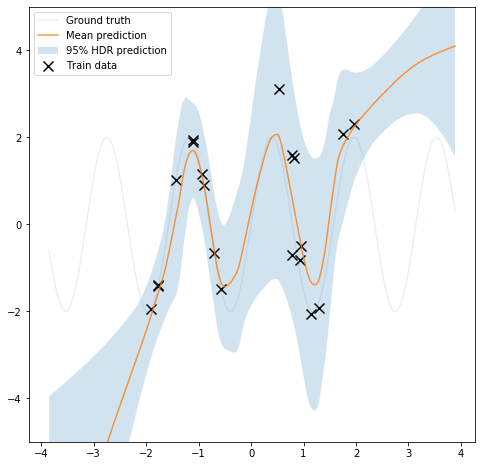

In [16]:
mean, std = ensemble.predict(x_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(_x_test, y_test, label="Ground truth", alpha=0.1)
ax.plot(_x_test, mean, label=f"Mean prediction", alpha=0.8)
ax.fill_between(_x_test.flatten(), mean.flatten() - 2 * std.flatten(), mean.flatten() + 2 * std.flatten(), alpha=0.2, label="95% HDR prediction")
ax.scatter(_x_train, y_train, c='k', marker='x', s=100, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.set_ylim([-5, 5])
ax.legend();
#fig.savefig(os.path.join(figure_dir, f"{n_networks}_ml_density_ensemble_gaussian_heteroscedastic.pdf"))

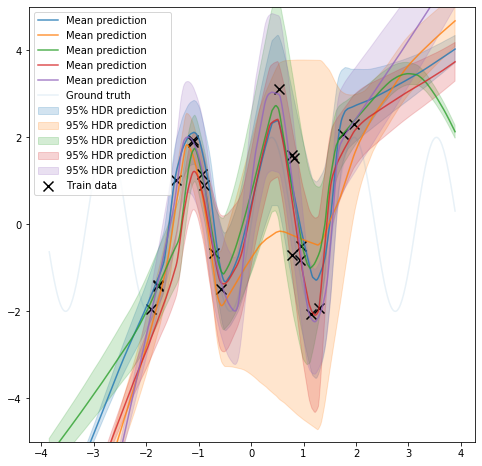

In [19]:
means, stds = ensemble.predict_mixture_of_gaussian(x_test)

fig, ax = plt.subplots(figsize=(8, 8))
for i, (mean, std) in enumerate(zip(means, stds)):
    c = sns.color_palette()[i]
    ax.plot(_x_test, mean, label=f"Mean prediction", c=c, alpha=0.8)
    ax.fill_between(_x_test.flatten(), mean.flatten() - 2 * std.flatten(), mean.flatten() + 2 * std.flatten(), color=c, alpha=0.2, label="95% HDR prediction")
ax.plot(_x_test, y_test, label="Ground truth", alpha=0.1)
ax.scatter(_x_train, y_train, c='k', marker='x', s=100, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.set_ylim([-5, 5])
ax.legend();
#fig.savefig(os.path.join(figure_dir, f"{n_networks}_ml_density_ensemble_mixture_of_gaussian_heteroscedastic.pdf"))

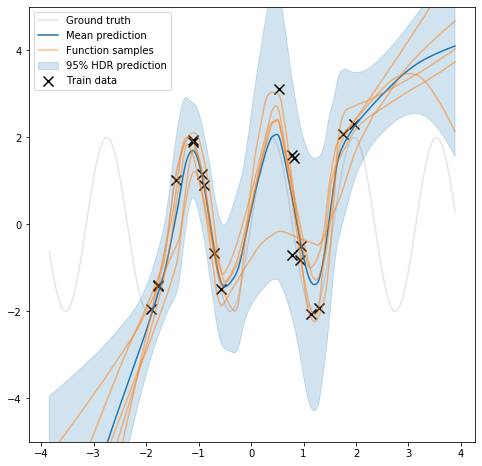

In [18]:
mean, std = ensemble.predict(x_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(_x_test, y_test, label="Ground truth", c='k', alpha=0.1)
c = sns.color_palette()[0]
ax.plot(_x_test, mean, label=f"Mean prediction", c=c, alpha=1)
ax.fill_between(_x_test.flatten(), mean.flatten() - 2 * std.flatten(), mean.flatten() + 2 * std.flatten(), color=c, alpha=0.2, label="95% HDR prediction")
means, stds = ensemble.predict_mixture_of_gaussian(x_test)
c = sns.color_palette()[1]
for i, (mean, std) in enumerate(zip(means[:-1], stds[:-1])):
    ax.plot(_x_test, mean, c=c, alpha=0.5)
ax.plot(_x_test, means[-1], label=f"Function samples", c=c, alpha=0.5)
ax.scatter(_x_train, y_train, c='k', marker='x', s=100, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.set_ylim([-5, 5])
ax.legend();
#fig.savefig(os.path.join(figure_dir, f"{n_networks}_ml_density_ensemble_gaussian_samples_heteroscedastic.pdf"))